In [196]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2

In [197]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


In [198]:
# Load the data

In [199]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [200]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  10000
Dimension of each sample d =  2


# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation.

One can see the function is $L$ smooth with $L =\frac1n\|A^T A\|  = \frac1n\|A\|^2$.

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [201]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute mean squared error
    # ***************************************************  
    squared = Axmb ** 2
    sum_squared = np.sum(squared)
    mse = 0.5 * sum_squared / len(Axmb)
    return mse

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [202]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute ||A.T*A||
    # ***************************************************
    ATA = A.T @ A
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute L = smoothness constant of f
    # ***************************************************
    L = np.linalg,norm(ATA, 2) / len(Axmb)
    return L

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [203]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and objective
    # ***************************************************
    Axmb = A @ x - b
    grad = A.T @ Axmb / len(Axmb)
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

In [204]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and objective function
        # ***************************************************
        grad, Axmb = compute_gradient(b, A, x)
        obj = 0.5 * np.sum(Axmb ** 2) / len (Axmb)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update x by a gradient descent step
        # ***************************************************
        x = x - gamma * grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [205]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.85

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=2792.2367127591674
Gradient Descent(1/49): objective=77.86503142886588
Gradient Descent(2/49): objective=16.791668598930205
Gradient Descent(3/49): objective=15.417517935256669
Gradient Descent(4/49): objective=15.386599545324014
Gradient Descent(5/49): objective=15.385903881550528
Gradient Descent(6/49): objective=15.385888229115624
Gradient Descent(7/49): objective=15.385887876935838
Gradient Descent(8/49): objective=15.385887869011794
Gradient Descent(9/49): objective=15.385887868833503
Gradient Descent(10/49): objective=15.385887868829494
Gradient Descent(11/49): objective=15.385887868829403
Gradient Descent(12/49): objective=15.3858878688294
Gradient Descent(13/49): objective=15.385887868829398
Gradient Descent(14/49): objective=15.3858878688294
Gradient Descent(15/49): objective=15.3858878688294
Gradient Descent(16/49): objective=15.385887868829398
Gradient Descent(17/49): objective=15.3858878688294
Gradient Descent(18/49): objective=15.385887868

Time Visualization

In [182]:
from ipywidgets import interact, IntSlider
from grid_search import *


def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)

    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(20.0, 4.0)
    display(fig)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Try doing gradient descent with a better learning rate

In [181]:
# Define the parameters of the algorithm.
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
L = np.linalg.norm(A.T @ A, 2)
gamma = 100 / L

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=780.8686016504854
Gradient Descent(1/49): objective=773.251154488717
Gradient Descent(2/49): objective=766.3890713588925
Gradient Descent(3/49): objective=760.2039370530574
Gradient Descent(4/49): objective=754.6257563657889
Gradient Descent(5/49): objective=749.5920220920866
Gradient Descent(6/49): objective=745.046889499426
Gradient Descent(7/49): objective=740.9404446521098
Gradient Descent(8/49): objective=737.2280555322218
Gradient Descent(9/49): objective=733.8697962622064
Gradient Descent(10/49): objective=730.8299359180801
Gradient Descent(11/49): objective=728.0764844539572
Gradient Descent(12/49): objective=725.580789158749
Gradient Descent(13/49): objective=723.317175852385
Gradient Descent(14/49): objective=721.2626297169031
Gradient Descent(15/49): objective=719.3965112603233
Gradient Descent(16/49): objective=717.7003034395566
Gradient Descent(17/49): objective=716.1573864323553
Gradient Descent(18/49): objective=714.7528369557789
Gradien

Time visualization with a better learning rate

In [184]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)

    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    display(fig)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [185]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [186]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  1030
Dimension of each sample d =  8


# Running gradient descent

## Assuming bounded gradients
Assume we are moving in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [187]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute the bound on the gradient norm
# ***************************************************
norm_ATA = np.linalg.norm(A.T @ A, 2)
norm_ATb = np.linalg.norm(A.T @ b, 2)
n = b.shape[0]
grad_norm_bound = (norm_ATA * 25 + norm_ATb) / n

Fill in the learning rate assuming bounded gradients

In [191]:
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute learning rate based on bounded gradient
# ***************************************************

gamma = 10 / grad_norm_bound  
print("grad_norm_bound:", grad_norm_bound)
print("gamma:", gamma)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err)
    bd_gradient_objectives_averaged.append(obj)

grad_norm_bound: 70.55157320349318
gamma: 0.14174028368094385
Gradient Descent(0/49): objective=780.8686016504854
Gradient Descent(1/49): objective=757.0572465196063
Gradient Descent(2/49): objective=740.5812543624813
Gradient Descent(3/49): objective=729.084584479613
Gradient Descent(4/49): objective=720.9907413148369
Gradient Descent(5/49): objective=715.2382349171139
Gradient Descent(6/49): objective=711.1080185774268
Gradient Descent(7/49): objective=708.1100789289962
Gradient Descent(8/49): objective=705.9084315994309
Gradient Descent(9/49): objective=704.2712418678465
Gradient Descent(10/49): objective=703.0374846206412
Gradient Descent(11/49): objective=702.0945497450593
Gradient Descent(12/49): objective=701.3631255793681
Gradient Descent(13/49): objective=700.7869435574245
Gradient Descent(14/49): objective=700.3257840958671
Gradient Descent(15/49): objective=699.9506801797878
Gradient Descent(16/49): objective=699.6406088594872
Gradient Descent(17/49): objective=699.380195073

## Gradient descent using smoothness
Fill in the learning rate using smoothness of the function

In [194]:
max_iters = 50


# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
L = np.linalg.norm(A.T @ A, 2)
gamma = 100 / L

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=780.8686016504854
Gradient Descent(1/49): objective=773.251154488717
Gradient Descent(2/49): objective=766.3890713588925
Gradient Descent(3/49): objective=760.2039370530574
Gradient Descent(4/49): objective=754.6257563657889
Gradient Descent(5/49): objective=749.5920220920866
Gradient Descent(6/49): objective=745.046889499426
Gradient Descent(7/49): objective=740.9404446521098
Gradient Descent(8/49): objective=737.2280555322218
Gradient Descent(9/49): objective=733.8697962622064
Gradient Descent(10/49): objective=730.8299359180801
Gradient Descent(11/49): objective=728.0764844539572
Gradient Descent(12/49): objective=725.580789158749
Gradient Descent(13/49): objective=723.317175852385
Gradient Descent(14/49): objective=721.2626297169031
Gradient Descent(15/49): objective=719.3965112603233
Gradient Descent(16/49): objective=717.7003034395566
Gradient Descent(17/49): objective=716.1573864323553
Gradient Descent(18/49): objective=714.7528369557789
Gradien

## Plotting the Evolution of the Objective Function

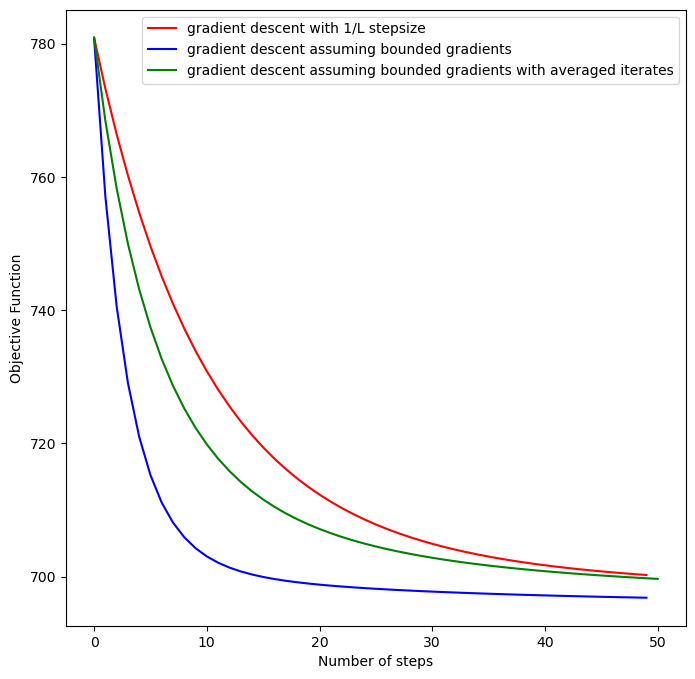

In [195]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()